

# Project: Investigate no show appointment Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?
here is a data set of appointment record in public hospitals at Vitora,Brazil is investigated 

in this analysis i'm trying to get the information from noshowappointment 
dataset which will answer my following questions

**1- is gender effect on showing ?**

**2- is appoitment day effect on showing?**

**3- is age effect on showing?**

**4- is scholarship effect on showing?**

**5- is diabetes effect on showing?**

**6- is hibertension effect on showing?**

**7- is alcoholism effect on showing?**

**8- is handicap effect on showing?**



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as nb
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling


In [2]:
df = pd.read_csv('noshowappointments.csv')
df.head(2)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No



### Data Cleaning

In [3]:
df.shape

(110527, 14)

<a id='eda'></a>
## Exploratory Data Analysis


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**there is no null or missing values but there is some data types must be handeld as PatientID, ScheduledDay, AppointmentDay**

**handicap column named wrong**

In [5]:
df.rename(columns={'Handcap': 'Handicap'}, inplace = True)
df.PatientId  = df.PatientId.astype(int)
def setup_date(df,date):
    if date =='':
        return None
    else:
        df[date] = pd.to_datetime(df[date]).dt.tz_localize(None)
##here this function i created to change the data type of the following features to datetime        

setup_date(df,'ScheduledDay')
setup_date(df,'AppointmentDay')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  int32         
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), int32(1), int6

In [7]:
df.nunique()

PatientId            161
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handicap               5
SMS_received           2
No-show                2
dtype: int64

**patientID must be unique for each patient**

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,-2.140311e+09,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,1.508486e+08,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-2.147484e+09,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.147484e+09,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.147484e+09,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-2.147484e+09,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.141274e+09,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**patientid looks like have -ve values**

**there is an error in age coulmn as the min value is -1 and some values is 0**

**handicap looks like have wrong values as it should be 0 for no handicap or 1 for having handicap**

In [9]:
df = df.query('Age >= 1')

**here i removed all rows which age is less than 1**

In [10]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,-2.140304e+09,5.675434e+06,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264
std,1.509045e+08,7.133274e+04,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725
min,-2.147484e+09,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.147484e+09,5.640490e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.147484e+09,5.680744e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-2.147484e+09,5.725634e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.141274e+09,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
df.duplicated().sum()

0

In [12]:
df['PatientId'].duplicated().sum()

106832

**here is showing that patentid have so many duplicates so it's better to drop it**

In [13]:
df = df.drop(['PatientId'] , axis = 1)
df

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,5651768,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,5650093,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,5630692,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,5630323,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [14]:
df['Handicap'].value_counts()

0    104747
1      2041
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [15]:
df = df.query('Handicap <= 1')
df.describe()

,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.067880e+05,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000,106788.000000
mean,5.675428e+06,38.299294,0.101051,0.203356,0.073978,0.031389,0.019113,0.323426
std,7.133632e+04,22.453253,0.301397,0.402497,0.261737,0.174368,0.136922,0.467786
min,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640484e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680740e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.725627e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


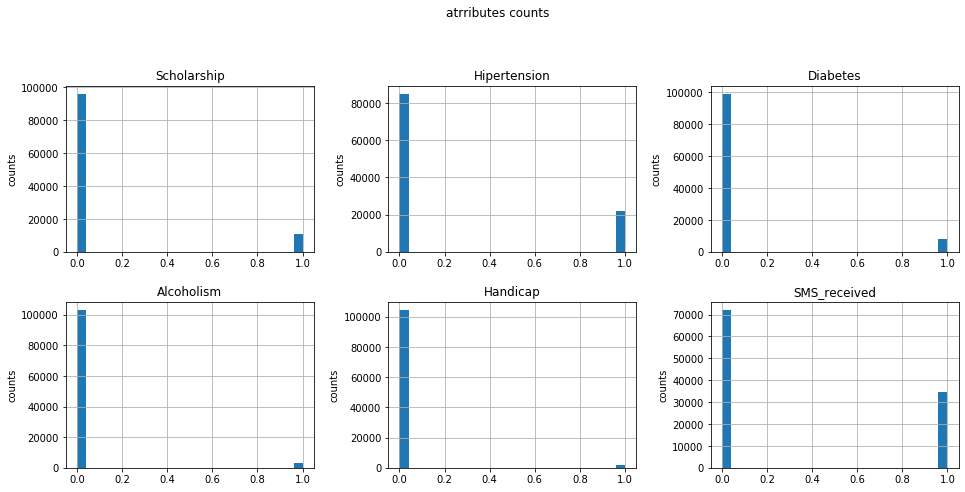

In [41]:
categorical_vars = [ 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received']
fig = plt.figure(figsize=(16, 11))
for i,var in enumerate(categorical_vars):
    ax = fig.add_subplot(3,3, i+1)
    plt.ylabel('counts')
    plt.suptitle('atrributes counts')
    df.hist(column = var,bins=25 ,ax=ax)
    
## instead of repeating the code to make this plots i made a for loop to iterate on this list and make a plot for each one     

### this charts shows the impact of each feature on showing

In [17]:
df['No-show']=nb.where(df['No-show'].str.contains("No"),0,1)
df.head(25)

C:\Users\EGYPT_LAPTOP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0
5,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,0
6,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1
7,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1
8,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,0
9,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,0


**now all atributes have the right values and right datatypes**

In [18]:
corrmatrix=df.corr()

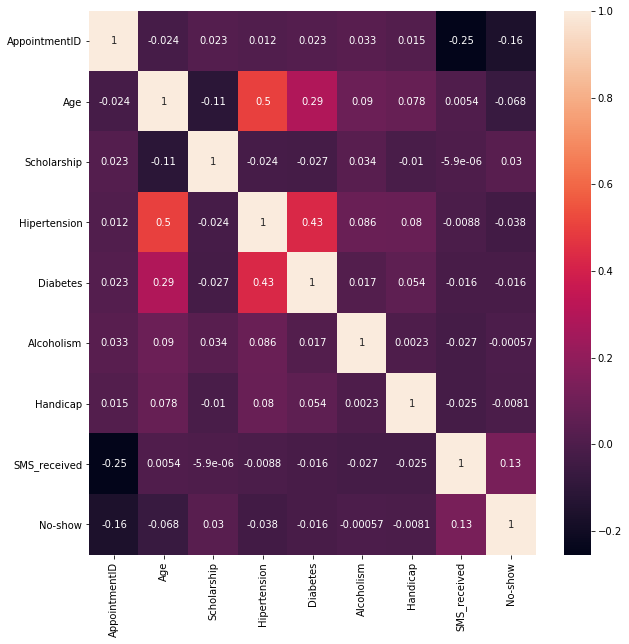

In [19]:
plt.figure(figsize = (10,10))
sns.heatmap(corrmatrix, annot=True)

**i think that holidays can effect on showing so y will make a new column for the day and do some visualizations**

In [20]:
df['day_of_appointment'] = df['AppointmentDay'].dt.day_name()
df

C:\Users\EGYPT_LAPTOP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,day_of_appointment
0,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday
1,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday
2,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday
3,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday
4,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,5651768,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,0,Tuesday
110523,5650093,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,0,Tuesday
110524,5630692,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,0,Tuesday
110525,5630323,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,0,Tuesday


In [21]:
df['day_of_appointment'].value_counts()

Wednesday    25047
Tuesday      24775
Monday       21867
Friday       18431
Thursday     16629
Saturday        39
Name: day_of_appointment, dtype: int64

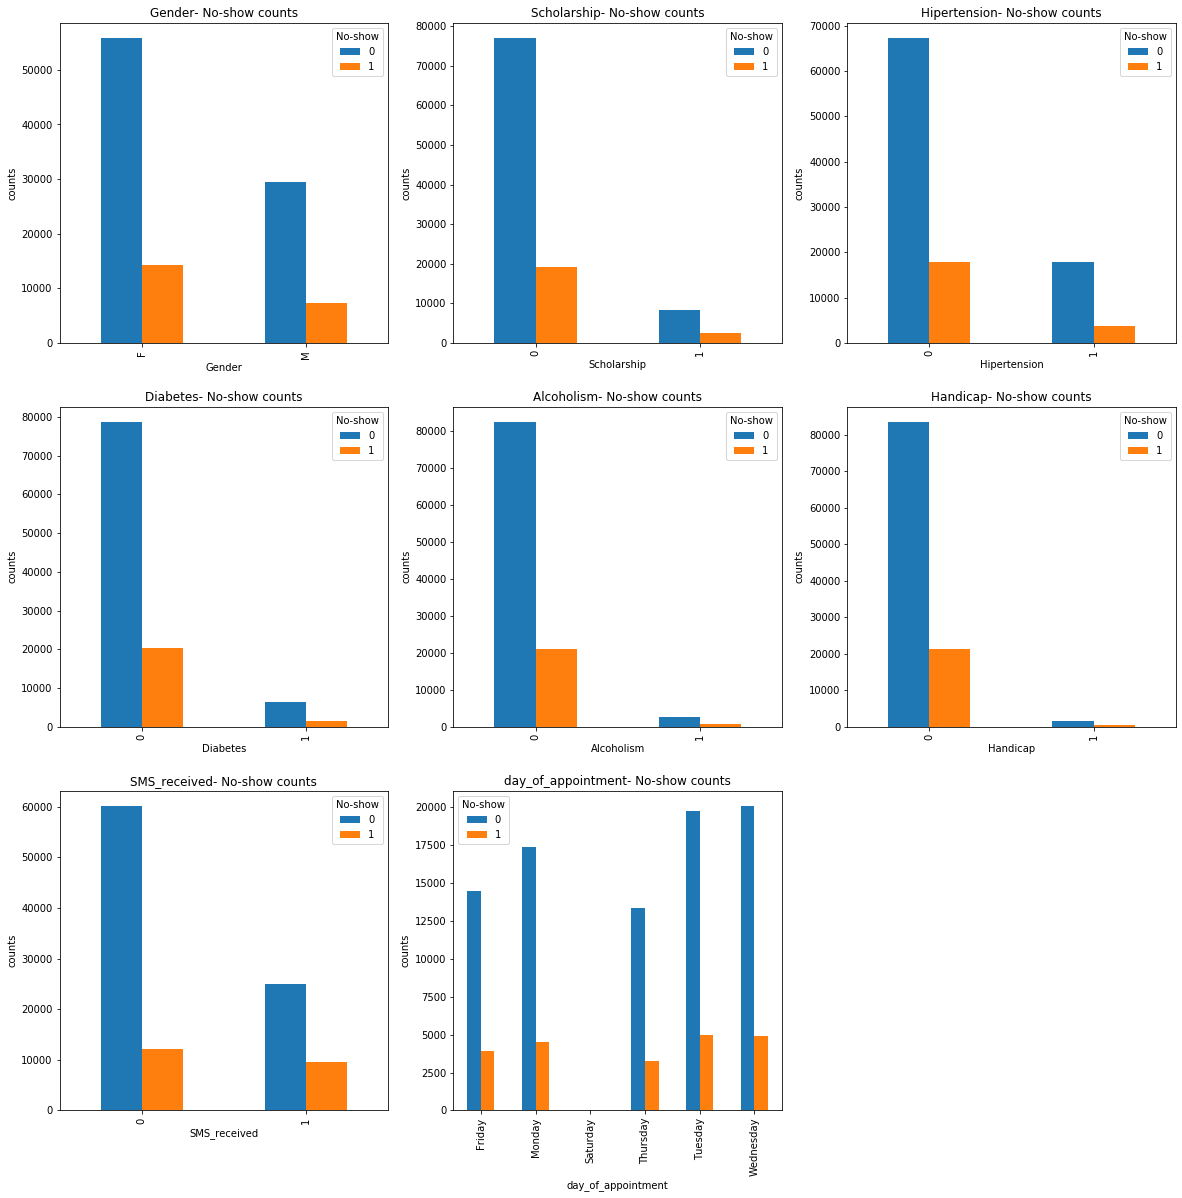

In [43]:
categorical_vars = ['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received','day_of_appointment']

fig = plt.figure(figsize=(20, 20))
for i, var in enumerate(categorical_vars):
    ax = fig.add_subplot(3, 3, i+1)
    plt.ylabel('counts')
    plt.title(str(var)+'-'+' No-show counts')
    df.groupby([var, 'No-show'])[var].count().unstack('No-show').plot(ax=ax, kind='bar')
    
 ## also this for loop to iterate on the list and create it's chart instead the code for each feature    

**here i can see what is the effect of each attribute on showing**

In [23]:
 df.groupby(['day_of_appointment', 'No-show'])['day_of_appointment'].value_counts()

day_of_appointment  No-show  day_of_appointment
Friday              0        Friday                14495
                    1        Friday                 3936
Monday              0        Monday                17361
                    1        Monday                 4506
Saturday            0        Saturday                 30
                    1        Saturday                  9
Thursday            0        Thursday              13388
                    1        Thursday               3241
Tuesday             0        Tuesday               19767
                    1        Tuesday                5008
Wednesday           0        Wednesday             20108
                    1        Wednesday              4939
Name: day_of_appointment, dtype: int64

**as i excepcted holidays has great effect**

# <a id='conclusions'></a>
## Conclusions

### Limitations


**1-some of our variables isn't numerical values,which does not allow for high level of statistical methods**

**2-we don't have some details like the weather of the appointment day which could make diffrence**


### Answers
**1- is gender effect on showing ?** yes it's effects as the showing of females is much more than males 

**2- is appoitment day effect on showing?** holidays has no visits (saturday - sunday) while the days at the middle of the week has the higher visits

**4- is scholarship effect on showing?** the people with no schoolarship has much more visits than the ones with a schoolarship

**5- is diabetes effect on showing?** people with no diabetes has more visits than diabetic people 

**6- is hibertension effect on showing?** people with hibertension tends to not showing 

**7- is alcoholism effect on showing?**  about all not alcoholism people tends to show  

**8- is handicap effect on showing?** a huge percent of not handicaped people had shown 
